# Plotting in python for Physics students

<div align="right">Edward Sternin</br>2025-09</div>


## What we want is...

* to see the experimental data
* to visualize a function
* to relate functions and data by adjusting parameters and fitting
* to tell a story visually, to make our plots pretty

This is a basic introduction, and it should be sufficient to get you going in your first- and second-year labs.  Mastering python is a long process, and one should not expect to become an expert overnight.  However, basics can be learned quickly, and using only a handful of commands. 

Here's a dataset, as measured in the lab, of a voltage across and a current through a load resistor connected to an unknown source. As we vary the resistance of the load, the following set of measurements is obtained:

```
#  V   I,mA
  0   0.468
  1   0.405
  2   0.342
  3   0.279
  4   0.216
  5   0.153
  6   0.090
  6.4 0.064
```

What does it look like?  How can we "plot $I$ along the $y$-axis as a function of $V$ along the $x$-axis"? Perhaps:
```
  plot(V,I)
```

Turns out, this is almost it.  Two things need to happen first:

  * tell python what $V$ and $I$ vectors are, directly or by reading from a data file
  * load the plotting tools we need from a python toolbox, a.k.a. a library
  * call a function <code>plot()</code> from that library and pass our vectors to it

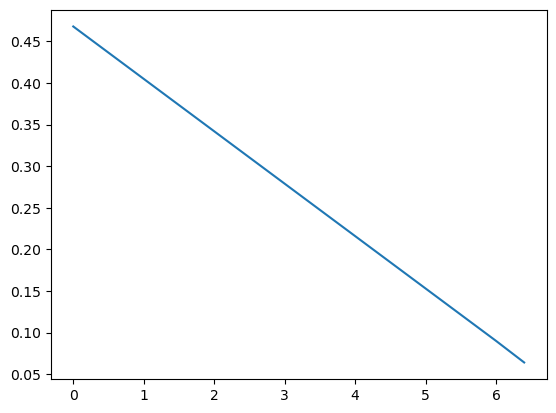

In [1]:
V = [ 0, 1, 2, 3, 4, 5, 6, 6.4]
I = [ 0.468, 0.405, 0.342, 0.279, 0.216, 0.153, 0.090, 0.064]

from matplotlib.pyplot import plot

plot(V,I);

We just grabbed the first tool that came to mind out of the toolbox, and for a quick-and-dirty look at the data this may be good enough.  But like all toolboxes, ours is stuffed with goodies, and we can quickly get better than our first primitive plot.  Also, Ohm's Law is boringly linear, a straight line.  Let's look instead at the power dissipated $P=VI=I^2R=V^2/R$ as a function of $V$, it should give us a parabola.  

But first, let's get a bigger toolbox:

In [2]:
from matplotlib.pyplot import *
from numpy import *

We just imported everything (<code>*</code>) from two very large libraries, and now our python session knows a lot of cool commands and functions.   If you were to do

<code>    dir()</code>

at this point, a very long list of functions would appear.

Some functions are about plotting (<code>matplotlib</code>), some are about numerics (<code>numpy</code>) like <code>sin()</code> and <code>cos()</code> or <code>multiply()</code>:

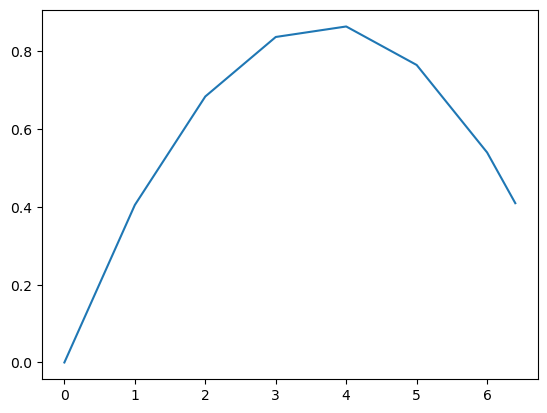

In [3]:
P = multiply(V,I);
plot(V,P);

We had to call a <code>multiply()</code> function from the numpy toolbox/library because multiplying two vectors is tricky: you need to specify whether it's a dot-product, a cross-product, or as here: an element-by-element product.

Also, we can start making our plot a bit better-looking, as well as telling a more complex story from the same experimental data. After all, we performed the measurement in the laboratory by changing the value of the load resistance, which of course is $R=V/I$, so how does power depends on the load resistance?

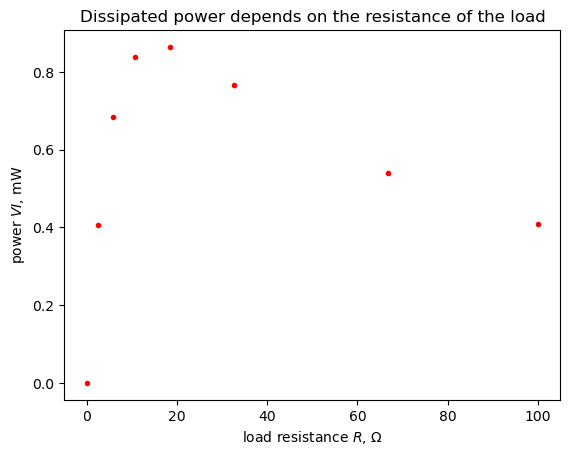

In [4]:
R=divide(V,I)
plot(R,P,'r.',label='data')
xlabel('load resistance $R$, $\\Omega$');
ylabel('power $VI$, mW');
title('Dissipated power depends on the resistance of the load');

There is an obvious maximum in the graph. This is the point where the impedance of the load $R$ matches the internal impedance $R_0$ of the source $V_0$, and the measured $V$ across $R$ at this point is exactly $\frac{1}{2}V_0$. At the extreme of current going to zero, there is a zero voltage drop across internal $R_0$ and so $V \approx V_0$. Looking at the data table yields a guesstimate of $V_0 \approx 6.5$ and $R_0 = 3.25\mbox{ V} / 0.25 \mbox{ mA} = 13\Omega$.

We expect the power dissipated on $R$ to be 
$$
  P = I^2R = \left( \frac{V_0}{R+R_0} \right)^2 R
$$

Let's try to add this theoretical prediction to the plot.  

We need to make a small change because of a python quirk. Since we are going to perform computations on an <em>array</em> or, mathematically speaking, a vector of $R$ values, we need to use a python <code>array()</code>, not a python list <code>[a, b, ...]</code>. Lists are more general objects in python and may include mixtures of things, like numbers and strings intermixed, but arrays are of numbers only. The side benefit of converting to arrays is that we no longer need to use <code>multiply()</code> and <code>divide()</code>, the usual <code>*</code> and <code>/</code> will suffice.

Since we want our theoretical curve to look smooth, we will also generate another array of all possible $R$ values, from the minimum to the maximum of the values we used in the experiment, but at a much finer step size, using function <code>arange(min,max,step)</code>. The resulting curve should look smooth in-between the data points, so we use a "blue line" plot <code>'b-'</code> instead of a "red point" <code>'r.'</code> scatter plot we used for the experimental data.

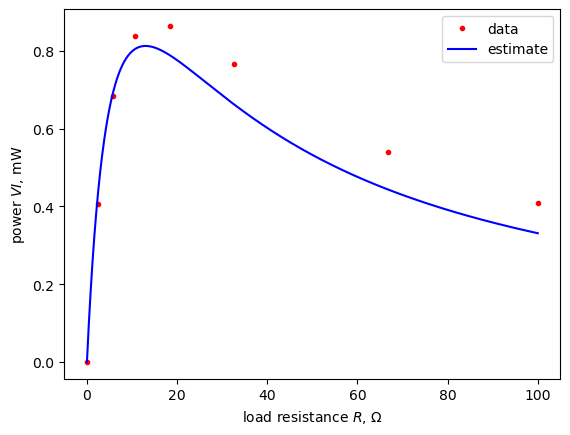

In [5]:
V = array([ 0, 1, 2, 3, 4, 5, 6, 6.4])
I = array([ 0.468, 0.405, 0.342, 0.279, 0.216, 0.153, 0.090, 0.064])
P=I*V
R=V/I

plot(R,P,'r.',label='data') # R and P are from the experimental data

V_0=6.5
R_0=13
r = arange(min(R),max(R),0.01) # array r spans the same range as R but on a fine grid
p = (V_0/(R_0+r))**2*r

plot(r,p,'b-',label='estimate') # r and p are from a theoretical prediction

legend()
xlabel('load resistance $R$, $\\Omega$');
ylabel('power $VI$, mW');

This is pretty good already, but let us refine our initial guesstimates of $V_0$ and $R_0$ values by treating them as parameters of some function and then performing a least-squares fit of the function to the data.

<code>numpy</code> already has some linear algebra tools (from the numpy toolbox) that we could use, but we can also import another toolbox, <code>scipy</code>, that has some more powerful and flexible tools, including <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.htm" target="_blank">non-linear least-squares curve fitting function</a>. When you follow the link to read up on how to call this tool, you will see a lot of powerful options available to you that control the exact details of how the fit is performed. In our case, we will use only the simplest form of the call to our Swiss-army-knife of a function, <code>curve_fit()</code>. Putting it all together:

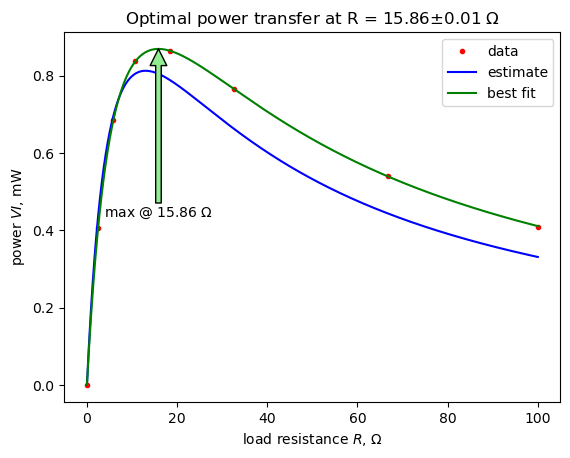

In [6]:
V = array([ 0, 1, 2, 3, 4, 5, 6, 6.4])
I = array([ 0.468, 0.405, 0.342, 0.279, 0.216, 0.153, 0.090, 0.064])
P=I*V
R=V/I

plot(R,P,'r.',label='data') # R and P are from the experimental data

def fun_p(r,v0,r0):
    return (v0/(r0+r))**2*r

V_0=6.5
R_0=13                        
r = arange(min(R),max(R),0.01) # array r spans the same range as R but on a fine grid

plot(r,fun_p(r,V_0,R_0),'b-',label='estimate') # r and p are from a theoretical prediction

from scipy.optimize import curve_fit

# curve_fit() returns results of the fit as two arrays:
# result[0] = 1D array of refined values of params
# result[1] = 2D array of estimated approximate covariances; the diagonals provide 
#             the variance of the parameter estimate. Standard deviation errors are 
#             sqrt(diag(result[1]))
[V0,R0],cov = curve_fit(fun_p,R,P)
[V0_err,R0_err] = sqrt(diag(cov))

plot(r,fun_p(r,V0,R0),'g-',label='best fit')

legend()
xlabel('load resistance $R$, $\\Omega$');
ylabel('power $VI$, mW');                      
title('Optimal power transfer at R = {:.2f}$\\pm${:.2f} $\\Omega$'.format(R0,R0_err));

Pmax = fun_p(R0,V0,R0)
annotate('max @ {:.2f} $\\Omega$'.format(R0),xy=(R0,Pmax),xytext=(R0,0.5*Pmax),
         horizontalalignment='center',arrowprops=dict(facecolor='lightgreen'));

savefig('optimum_power.pdf');

### Details in the above script

  * <code>label='string'</code> should be entered with every <code>plot()</code> command, but will only show up when <code>legend()</code> has been called;
  * defining a function is useful for both plotting a guesstimate and to supply in the <code>curve_fit()</code> call;
  * LaTeX symbols can be included in text strings, surrounded by $\$ $ signs, but each backslash needs to be doubled-up, e.g. <code>\$\\\\Omega\$</code> for $\Omega$;
  * in python, <code>{:d}</code> for integers or <code>{:f}</code> for floating-point numbers, etc. are format designators, and they allow you to include values in strings;
  * arrows are just one type of annotation: <code>xy=(__,__)</code> places the tip and <code>xytext=(__,__)</code> places the start of the arrow, which is where the annotation text goes;
  * the format of the output file is inferred from the extension specified (.pdf, .png, .svg). Whenever possible, and especially if you are planning to insert the resulting figure into your LaTeX document, use vector formats (.svg, .pdf) which scale smoothly at different display and paper resolutions, and not rasterized bitmap files (.png, .jpg).
  

## Other useful things

### Reading data from files
Using jupyter magic, create a data file on the fly, then read it into python. This is equivalent to the first two lines of the above script, and allows one to separate the actions of the script from the data these actions apply to.  If the script has a simple loop over a list of file names, it can perform the same actions on a large number of data files in one go.

In [7]:
%%file VI.dat
#  V   I,mA
  0   0.468
  1   0.405
  2   0.342
  3   0.279
  4   0.216
  5   0.153
  6   0.090
  6.4 0.064

Overwriting VI.dat


In [8]:
data=loadtxt('VI.dat')
V = data[:,0] # first column
I = data[:,1] # second column

### Error bars

In the same manner, if the third column in the file were to contain error bars for every data point, is would be easy to add <code>dI = data[:,2]</code>, and use <code>errorbar()</code> instead of <code>plot()</code> with <code>yerr = dI</code> included in the calling sequence:
<code>
    dI = data[:,2]
    errorbar(V,I, fmt='ro', yerr = dI);
</code>

In other cases, only the instrumental error is known, the same for all measurements. <code>errorbar()</code> is flexible enough that is can accept both a vector and a scalar for errorbars, it automatically assigns the same scalar number (say, 0.02 i.e. 2 in the second digit after the decimal of $I$) to all errorbars: 
<code>
    errorbar(V,I, fmt='ro', yerr = 0.02);
</code>

Alternatively, one could create a <em>vector</em> of the same size as the data vector, but with all values set to that instrumental error. One can use standard python declarattions, like this:
<code>
    dI = array([0.02]*len(I))
</code>

or one might prefer to do this vector multiplication by a scalar to achieve the same goal:
<code>
    dI = 0.0*I + 0.02
</code>

You can also have asymmetric errorbars, different below and above the data values.  And, of course, you can also add <code>xerr = ...</code> in the same way.

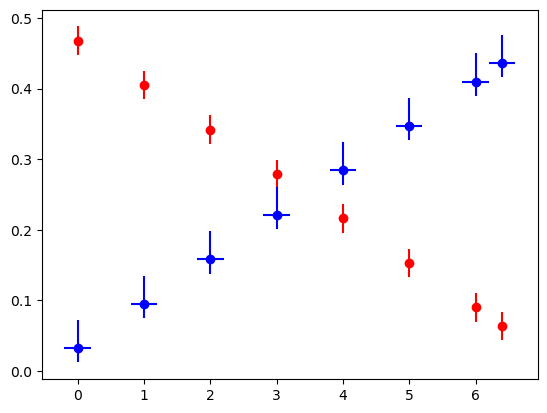

In [9]:
errorbar(V,I, fmt='ro', yerr = 0.02);

dI = array([0.02]*len(I));
errorbar(V,0.5-I, fmt='bo', xerr = 0.2, yerr = [dI,2*dI]);

### Multiple axes, multiple plots on a figure

When two graphs display very different quantities that cannot be shown on the same scale, there are two options: overlaying the two plots on the same graph, but providing a separate vertical axis for each of the two quantities, or stacking two separate graphs on the same figure.

Text(0, 0.5, 'power $P$, mW')

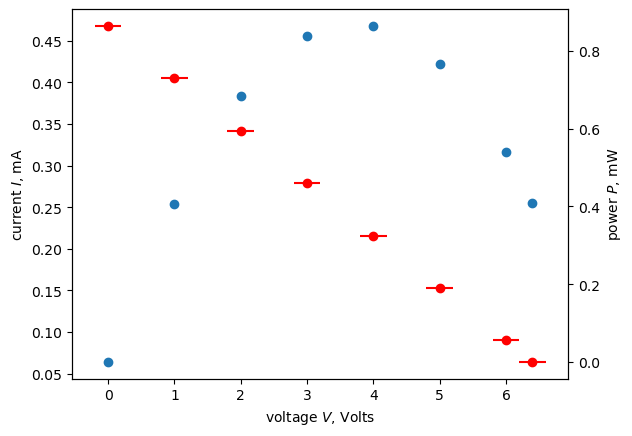

In [10]:
figure()
errorbar(V,I, fmt='ro', xerr = 0.2);
ylabel('current $I$, mA')
xlabel('voltage $V$, Volts')
twinx() # <- new axes sharing x range
scatter(V,I*V)
ylabel('power $P$, mW')

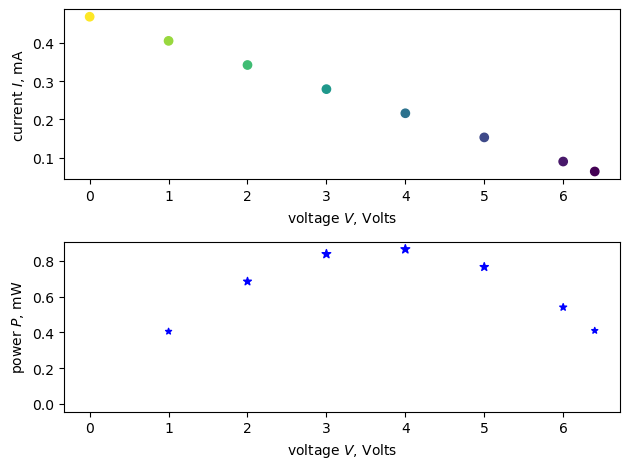

In [11]:
subplot(211) # total_number_of_rows, total_number_of_cols, index_of_this_subplot
scatter(V,I,c=I,marker='o');
ylabel('current $I$, mA')
xlabel('voltage $V$, Volts')
subplot(212)
P=I*V
scatter(V,P,c='b',s=50*P,marker='*')
ylabel('power $P$, mW')
xlabel('voltage $V$, Volts')
tight_layout()

Note how providing an array to <code>c=</code> (colour) or to <code>s=</code> (size) settings in the <code>scatter()</code> command changes colour or size to marker symbols at every data point.

### Many more things

Many other aspects of the graph appearance can be controlled.  For some of them, control is simply a matter of inserting a pair <code>keyword=value</code> into the calling sequence of one of the plotting commands, for some it requires invoking a different command altogether (e.g. <code>contour()</code>). This simple introduction just covered the basics; for more - RTFM ("read the fine manual").

Happy trails!